In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import itertools
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from warnings import filterwarnings
filterwarnings('ignore')
plt.style.use('_mpl-gallery')

In [ ]:
from sklearn.model_selection import train_test_split , GridSearchCV, KFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0
767,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0.0


In [ ]:
projectdf = pd.DataFrame(data)
projectdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.2 KB


In [ ]:
projectdf.isnull().sum()

Pregnancies                 1
Glucose                     1
BloodPressure               1
SkinThickness               1
Insulin                     1
BMI                         1
DiabetesPedigreeFunction    1
Age                         1
Outcome                     1
dtype: int64

In [ ]:
projectdf.dropna(inplace = True)


In [ ]:
projectdf.fillna(0, inplace= True)

In [ ]:
projectdf.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
projectdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
projectdf.duplicated().sum()

0

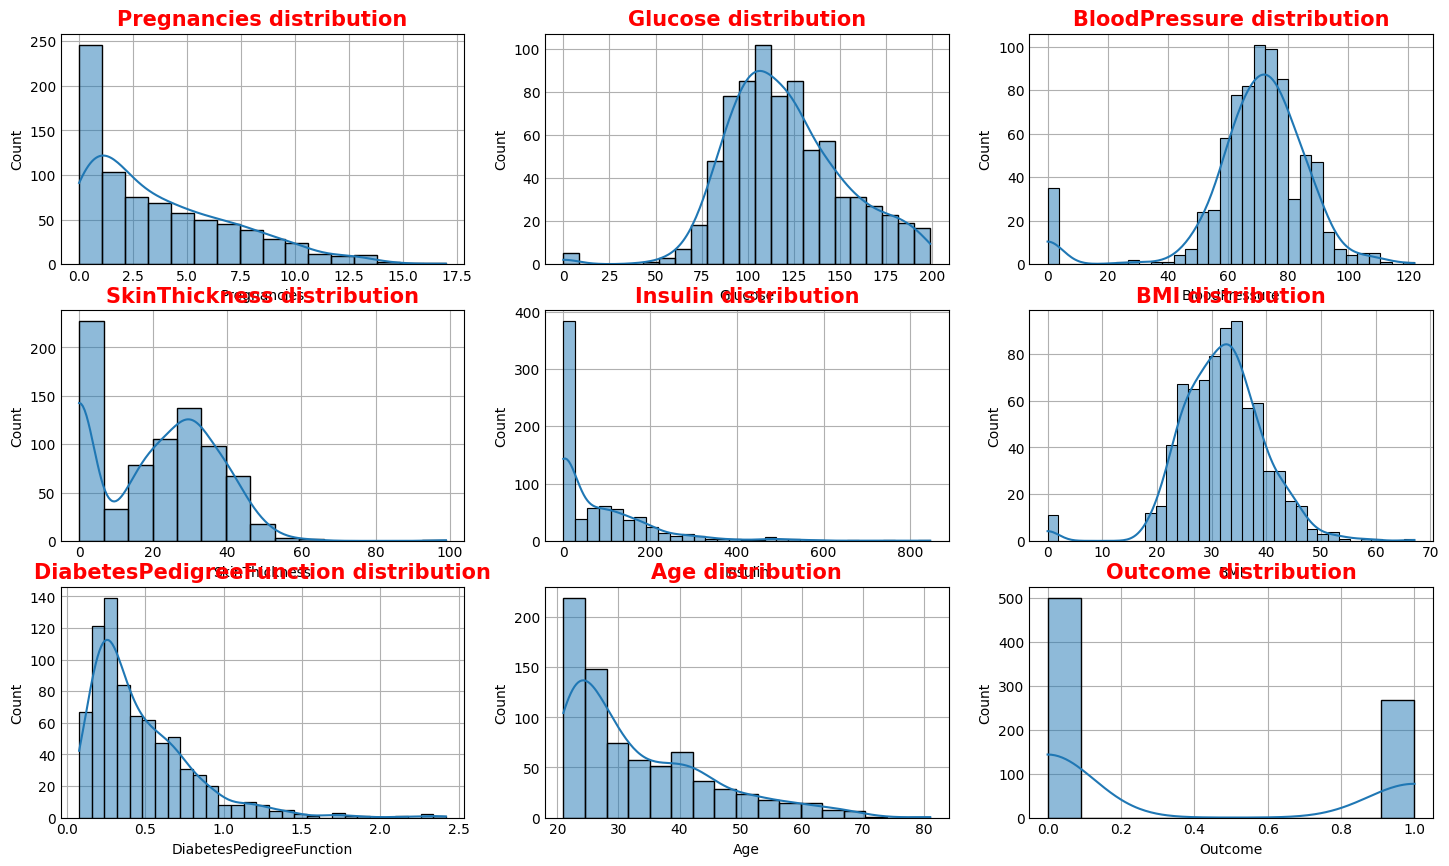

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(14, 8))
for i, col in enumerate(projectdf.columns):
    sns.histplot(projectdf[col], kde=True, ax=ax[i // 3, i % 3])
    ax[i // 3, i % 3].set_title(f"{col} distribution", fontsize=15, fontweight='bold', c='r')
plt.show()

In [ ]:
project2df = projectdf.copy()
zero_col = ['Glucose','Insulin','SkinThickness','BloodPressure','BMI']
project2df[zero_col] = project2df[zero_col].replace(0, np.nan)

In [ ]:
project2df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

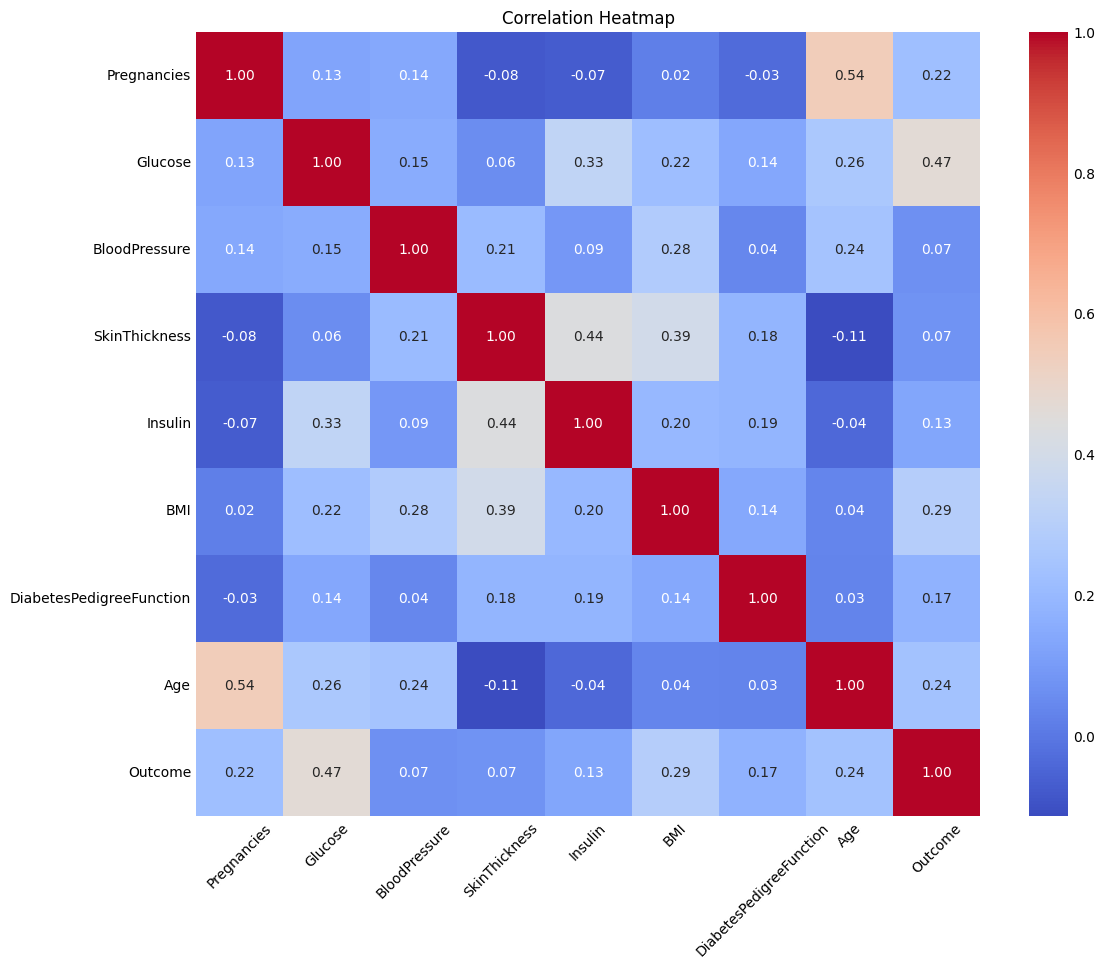

In [ ]:
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Heatmap')
plt.show()

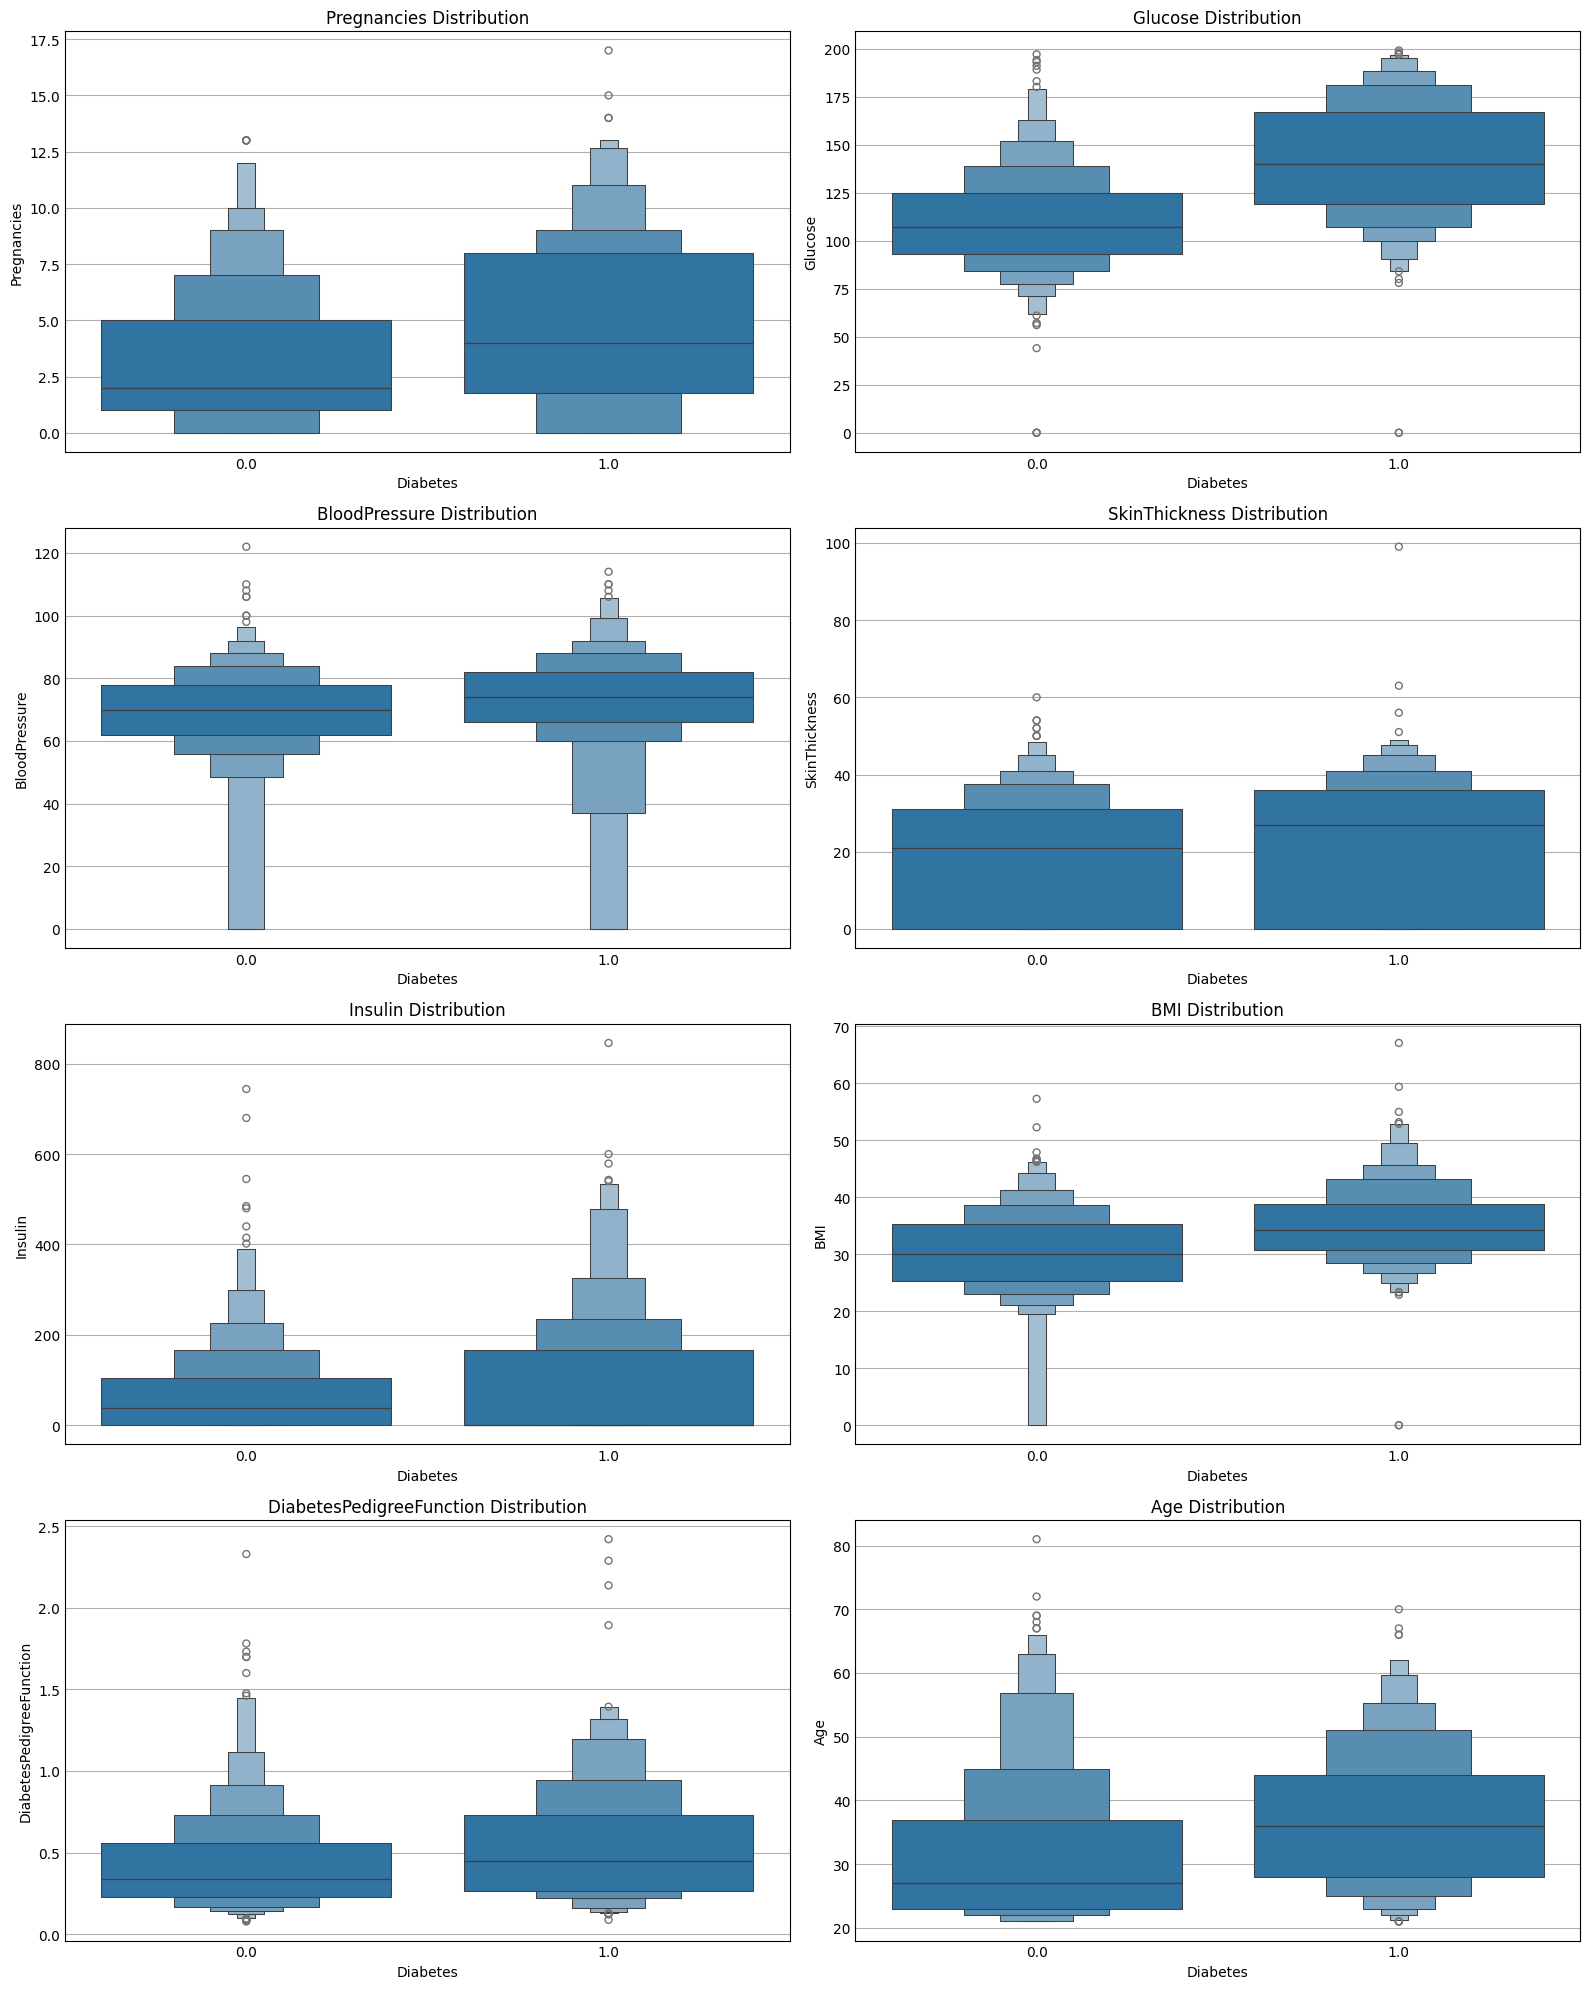

In [ ]:
fig, axes = plt.subplots(nrows=len(projectdf.columns) // 2, ncols=2, figsize=(16, 20))

for idx, column in enumerate(projectdf.drop(columns = 'Outcome')):
    row_idx = idx // 2
    col_idx = idx % 2
    sns.boxenplot( x='Outcome' , y= column , data=projectdf, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_xlabel("Diabetes")
    axes[row_idx, col_idx].set_ylabel(column)
    axes[row_idx, col_idx].set_title(f"{column} Distribution")
plt.tight_layout()
plt.show()

In [ ]:
for col in ['Glucose', 'Insulin', 'SkinThickness']:
    median_col = project2df[col][project2df[col].notna()].median()
    project2df[col].fillna(median_col, inplace=True)
for col in ['BMI', 'BloodPressure']:
    mean_col = project2df[col][project2df[col].notna()].mean()
    project2df[col].fillna(mean_col, inplace=True)

In [ ]:
project2df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
project2df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 60.0 KB


In [ ]:
project2df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


In [ ]:
project2df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47.0,1.0


In [ ]:
fig = go.Figure()
my_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness',
           'Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in my_cols:
    fig.add_trace(go.Box(y=project2df[col], name=f'{col}'))
print((col))

Age


In [ ]:
X = project2df.drop('Outcome', axis=1)
y = project2df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81        99
         1.0       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



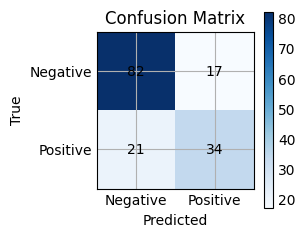

In [42]:
y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
tick_marks = np.arange(len(set(y_test)))
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, str(conf_matrix[i][j]), ha='center', va='center')

plt.show()

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81        99
         1.0       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



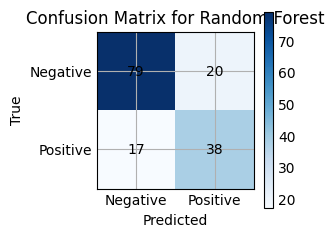

In [41]:
y_pred_rf = rf_model.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.imshow(conf_matrix_rf, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix for Random Forest')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
tick_marks = np.arange(len(set(y_test)))
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
for i in range(len(conf_matrix_rf)):
    for j in range(len(conf_matrix_rf[i])):
        plt.text(j, i, str(conf_matrix_rf[i][j]), ha='center', va='center')

plt.show()

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)  
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.7207792207792207
              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78        99
         1.0       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



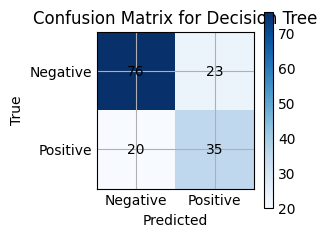

In [40]:
y_pred_dt = dt_model.predict(X_test)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.imshow(conf_matrix_dt, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix for Decision Tree')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
tick_marks = np.arange(len(set(y_test)))
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
for i in range(len(conf_matrix_dt)):
    for j in range(len(conf_matrix_dt[i])):
        plt.text(j, i, str(conf_matrix_dt[i][j]), ha='center', va='center')

plt.show()

In [47]:
prediction_data = data.iloc[11:20]  

X_pred = prediction_data.drop("Outcome", axis=1)  
y_true = prediction_data["Outcome"]  

y_pred = model.predict(X_pred)  

print("Predicted outcomes:")
for i in range(len(prediction_data)):
    print("Row", i+1, "- Predicted:", y_pred[i], ", True:", y_true.iloc[i])

Predicted outcomes:
Row 1 - Predicted: 1.0 , True: 1.0
Row 2 - Predicted: 1.0 , True: 0.0
Row 3 - Predicted: 1.0 , True: 1.0
Row 4 - Predicted: 1.0 , True: 1.0
Row 5 - Predicted: 1.0 , True: 1.0
Row 6 - Predicted: 1.0 , True: 1.0
Row 7 - Predicted: 1.0 , True: 1.0
Row 8 - Predicted: 1.0 , True: 0.0
Row 9 - Predicted: 1.0 , True: 1.0


In [55]:
new_data = pd.DataFrame({
    'Pregnancies': [3, 0],
    'Glucose': [110, 10],
    'BloodPressure': [70, 80],
    'SkinThickness': [25, 5],
    'Insulin': [80, 40],
    'BMI': [30, 20],
    'DiabetesPedigreeFunction': [0.5, 0.12],
    'Age': [35, 20]
})

In [56]:
predicted_outcomes = model.predict(new_data)  
print("Predicted outcomes for new data points:")
for i in range(len(new_data)):
    print("Data Point", i+1, "- Predicted:", predicted_outcomes[i])

Predicted outcomes for new data points:
Data Point 1 - Predicted: 1.0
Data Point 2 - Predicted: 1.0
